In [1]:
%matplotlib inline

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray
import xbout
import scipy
import re

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))

from hermes3.utils import *

import gridtools.solps_python_scripts.setup
from gridtools.solps_python_scripts.utilities.last10s       import read_last10s

from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *

from code_comparison.code_comparison import *
from code_comparison.solps_pp import *
from code_comparison.viewer_2d import *


%load_ext autoreload
%autoreload 2

plt.close("all")
%matplotlib inline

print("Done")


st40_phys_viewer can not be loaded from outside Tokamak Energy!

Done


In [2]:
casestore = dict()

In [3]:
   
db = CaseDB()
toload = [
    dict(name="afnE_base", id = "d24bd-cond0.25_frec0.48"),
]
casestore = {}
for case in toload:
    casestore[case["name"]] = db.load_case_2D(case["id"], use_squash = True, verbose = True)

- Reading case d24bd-cond0.25_frec0.48
-----------------------
- Looking for squash file
- Squash file found. squash date 10/16/2023, 10:34:08, dmp file date 10/15/2023, 23:08:48



In [45]:
%matplotlib widget

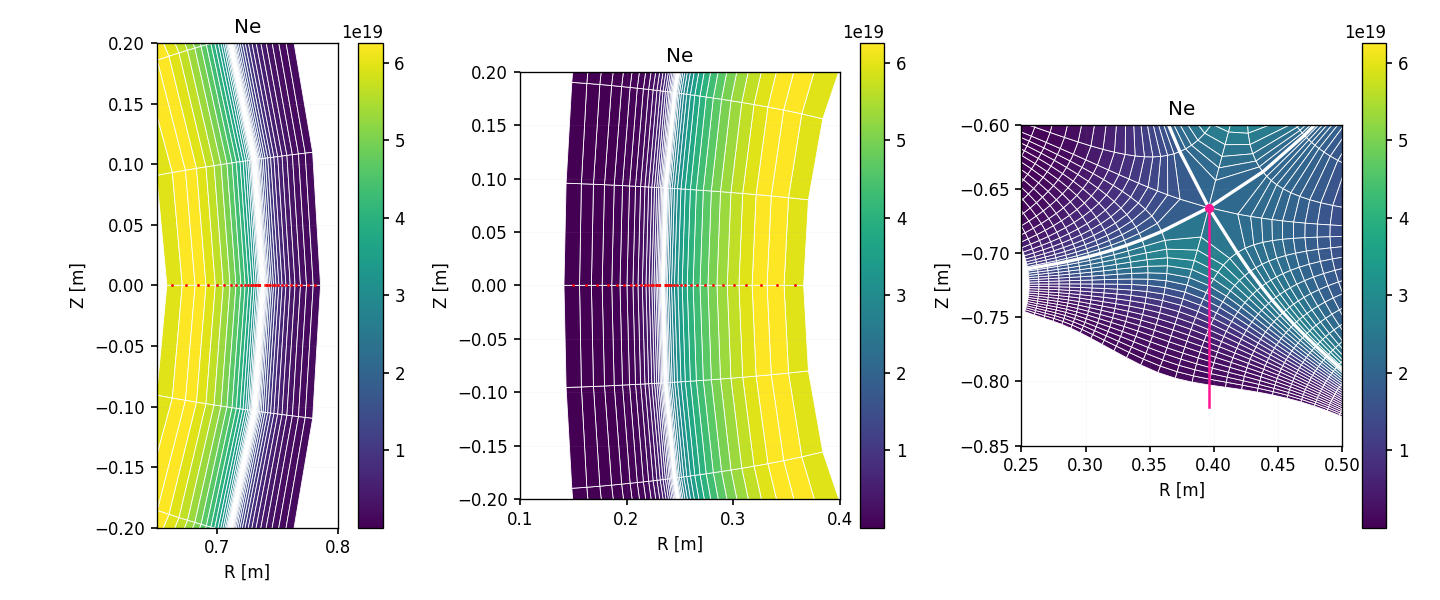

In [55]:
plt.close("all")
ds = casestore["afnE_base"].ds
m = ds.metadata

omp_a = ds.hermesm.select_region("outer_midplane_a")
omp_b = ds.hermesm.select_region("outer_midplane_b")
ompR = ((omp_a["R"] + omp_b["R"])*0.5).values
ompZ = ((omp_a["Z"] + omp_b["Z"])*0.5).values

impR = ((ds.hermesm.select_region("inner_midplane_a")["R"] + ds.hermesm.select_region("inner_midplane_b")["R"])*0.5).values
impZ = ((ds.hermesm.select_region("inner_midplane_a")["Z"] + ds.hermesm.select_region("inner_midplane_b")["Z"])*0.5).values



fig, axes = plt.subplots(1,3, figsize = (12,5))
for ax in axes:
    ds["Ne"].bout.polygon(ax = ax, antialias = True, linecolor = "white", linewidth = 0.5)
    
## OMP
axes[0].set_xlim(0.65, 0.8);  axes[0].set_ylim (-0.2, 0.2)
axes[0].scatter(ompR, ompZ, color = "red", s = 0.5)

## IMP
axes[1].set_xlim(0.1, 0.4); axes[1].set_ylim (-0.2, 0.2)
axes[1].scatter(impR, impZ, color = "red", s = 0.5)


## PFR
axes[2].set_xlim(0.25, 0.50); axes[2].set_ylim (-0.85, -0.6)

xpoint = ds.isel(x = m["ixseps1"], theta = m["j1_1g"])
xR, xZ = xpoint["Rxy_upper_left_corners"].values, xpoint["Zxy_upper_left_corners"].values
axes[2].scatter(impR, impZ, color = "red", s = 0.5)
axes[2].scatter(xR, xZ, color = "deeppink", s = 20, zorder = 100)

xlineZ = np.linspace(xZ, -0.82, 10)
xlineR = np.ones_like(xlineZ) * xR
axes[2].plot(xlineR, xlineZ, color = "deeppink", zorder = 100)

fig.tight_layout()

# Manually found widths and intercept

In [ ]:
omp_sep = 0.73761
imp_sep = 0.23395

omp_innerR = omp_sep - 0.68174
omp_outerR = 0.77370 - omp_sep
imp_outerR = imp_sep - 0.16708
imp_innerR = 0.33155 - imp_sep

pfrR = 0.39608
pfrZ = -0.79342

print(f"\nOMP")
print(f"Inner thickness: {omp_innerR:.5f} [m]")
print(f"Outer thickness: {omp_outerR:.5f} [m]")
print(f"\nIMP")
print(f"Inner thickness: {imp_innerR:.5f} [m]")
print(f"Outer thickness: {imp_outerR:.5f} [m]")
print("\nPFR")
print(f"Intercept (R,Z): {pfrR:.5f}, {pfrZ:.5f} [m]")

In [54]:
omp_sep = 0.73761
imp_sep = 0.23395

omp_innerR = omp_sep - 0.68174
omp_outerR = 0.77370 - omp_sep
imp_outerR = imp_sep - 0.16708
imp_innerR = 0.33155 - imp_sep

pfrR = 0.39608
pfrZ = -0.79342

print(f"\nOMP")
print(f"Inner thickness: {omp_innerR:.5f} [m]")
print(f"Outer thickness: {omp_outerR:.5f} [m]")
print(f"\nIMP")
print(f"Inner thickness: {imp_innerR:.5f} [m]")
print(f"Outer thickness: {imp_outerR:.5f} [m]")
print("\nPFR")
print(f"Intercept (R,Z): {pfrR:.5f}, {pfrZ:.5f} [m]")


OMP
Inner thickness: 0.05587 [m]
Outer thickness: 0.03609 [m]

IMP
Inner thickness: 0.09760 [m]
Outer thickness: 0.06687 [m]

PFR
Intercept (R,Z): 0.39608, -0.79342 [m]


In [36]:



omp_outerR

0.7721669234097837

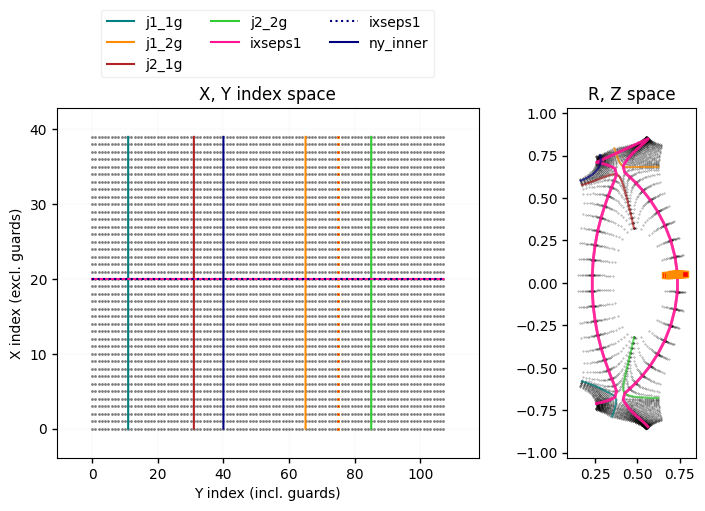

In [24]:
plot_selection(ds, ds.hermesm.select_region("outer_midplane_a"))

In [6]:
(omp_a.coords + omp_b.coords)/2

TypeError: unsupported operand type(s) for +: 'DatasetCoordinates' and 'DatasetCoordinates'